In [16]:
import os
from pprint import pprint

from langchain_core.messages import AIMessage, HumanMessage, RemoveMessage, trim_messages
from langchain_openai import ChatOpenAI
from langgraph.graph import MessagesState, StateGraph, START, END
from IPython.display import Image, display


os.environ["LANGSMITH_TRACING"] = "true"
os.environ["LANGSMITH_PROJECT"] = "langchain-academy"

In [4]:
messages = [
    AIMessage(f"So you said you were researching ocean mammals?", name="Bot"),
    HumanMessage(f"Yes, I know about whales. But what others should I learn about?", name="Lance")
]

for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: Bot

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: Lance

Yes, I know about whales. But what others should I learn about?


In [6]:
llm = ChatOpenAI(model="gpt-4o")
llm.invoke(messages)

AIMessage(content='That\'s awesome that you\'re learning about ocean mammals! Besides whales, there are plenty of fascinating marine mammals that inhabit our oceans. Here are some noteworthy ones to explore:\n\n### **1. Dolphins**\n   - Dolphins are closely related to whales and belong to the cetacean family. \n   - Some common species include bottlenose dolphins, spinner dolphins, and orcas (killer whales, which are actually dolphins!).\n   - Known for their intelligence, social behavior, and playful personalities, dolphins can communicate through clicks and whistles.\n\n### **2. Seals**\n   - Seals belong to the family **Pinnipedia**, which includes sea lions and walruses as well.\n   - Common species include harbor seals and elephant seals.\n   - They spend much of their time in water but come ashore to breed and rest.\n   \n### **3. Sea Lions**\n   - These are also **pinnipeds**, but unlike seals, they are more mobile on land due to their ability to use their flippers as "feet."\n 

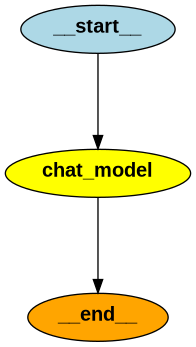

In [8]:
def chat_model_node(state: MessagesState):
    return {"messages": llm.invoke(state["messages"])}

builder = StateGraph(MessagesState)
builder.add_node("chat_model", chat_model_node)

builder.add_edge(START, "chat_model")
builder.add_edge("chat_model", END)

graph = builder.compile()
display(Image(graph.get_graph().draw_png()))

In [9]:
output = graph.invoke({'messages': messages})
for m in output['messages']:
    m.pretty_print()

================================== Ai Message ==================================
Name: Bot

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: Lance

Yes, I know about whales. But what others should I learn about?
================================== Ai Message ==================================

That's fantastic! Whales are indeed some of the most fascinating ocean mammals. There’s a whole world of marine mammals worth exploring. Here are some key groups you should look into:

### **1. Dolphins**
Dolphins are highly intelligent and social animals. Common species include the bottlenose dolphin, spinner dolphin, and the orca (killer whale)—which is actually part of the dolphin family. They use echolocation to hunt and navigate.

### **2. Porpoises**
Porpoises look similar to dolphins but are smaller and have blunt, rounded snouts. They are shy compared to dolphins and have spade-shaped teeth instead of con

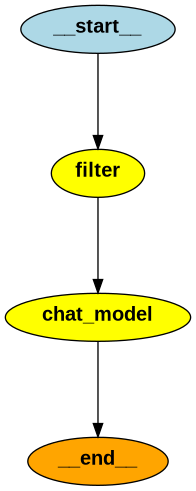

In [11]:
def filter_messages(state: MessagesState):
    delete_messages = [RemoveMessage(id=m.id) for m in state["messages"][:-2]]
    return {"messages": delete_messages}

def chat_model_node(state: MessagesState):    
    return {"messages": [llm.invoke(state["messages"])]}


builder = StateGraph(MessagesState)

builder.add_node("filter", filter_messages)
builder.add_node("chat_model", chat_model_node)

builder.add_edge(START, "filter")
builder.add_edge("filter", "chat_model")
builder.add_edge("chat_model", END)

graph = builder.compile()
display(Image(graph.get_graph().draw_png()))

In [12]:
messages = [
    AIMessage("Hi.", name="Bot", id="1"),
    HumanMessage("Hi.", name="Lance", id="2"),
    AIMessage("So you said you were researching ocean mammals?", name="Bot", id="3"),
    HumanMessage("Yes, I know about whales. But what others should I learn about?", name="Lance", id="4")
]

output = graph.invoke({'messages': messages})
for m in output['messages']:
    m.pretty_print()

================================== Ai Message ==================================
Name: Bot

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: Lance

Yes, I know about whales. But what others should I learn about?
================================== Ai Message ==================================

That's awesome, Lance! Whales are fascinating ocean mammals, but there's a whole world of other marine mammals to explore. Here are a few you might find intriguing:

### **1. Dolphins**
- Dolphins are intelligent, social, and highly playful creatures. They belong to the same family as whales (cetaceans) and can be found in oceans all over the world.
- Bottlenose dolphins are the most well-known species, but others include spinner dolphins and orcas (which are technically dolphins!).

---

### **2. Sea Otters**
- Sea otters are adorable and critical to marine ecosystems. They use tools (like rocks) to open their s

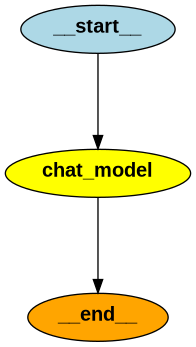

In [13]:
def chat_model_node(state: MessagesState):
    return {"messages": [llm.invoke(state["messages"][-1:])]}

builder = StateGraph(MessagesState)
builder.add_node("chat_model", chat_model_node)

builder.add_edge(START, "chat_model")
builder.add_edge("chat_model", END)

graph = builder.compile()
display(Image(graph.get_graph().draw_png()))

In [14]:
messages.append(output['messages'][-1])
messages.append(HumanMessage(f"Tell me more about Narwhals!", name="Lance"))

for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: Bot

Hi.
================================ Human Message =================================
Name: Lance

Hi.
================================== Ai Message ==================================
Name: Bot

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: Lance

Yes, I know about whales. But what others should I learn about?
================================== Ai Message ==================================

That's awesome, Lance! Whales are fascinating ocean mammals, but there's a whole world of other marine mammals to explore. Here are a few you might find intriguing:

### **1. Dolphins**
- Dolphins are intelligent, social, and highly playful creatures. They belong to the same family as whales (cetaceans) and can be found in oceans all over the world.
- Bottlenose dolphins are the most well-known species, but others include 

In [15]:
output = graph.invoke({'messages': messages})
for m in output['messages']:
    m.pretty_print()

================================== Ai Message ==================================
Name: Bot

Hi.
================================ Human Message =================================
Name: Lance

Hi.
================================== Ai Message ==================================
Name: Bot

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: Lance

Yes, I know about whales. But what others should I learn about?
================================== Ai Message ==================================

That's awesome, Lance! Whales are fascinating ocean mammals, but there's a whole world of other marine mammals to explore. Here are a few you might find intriguing:

### **1. Dolphins**
- Dolphins are intelligent, social, and highly playful creatures. They belong to the same family as whales (cetaceans) and can be found in oceans all over the world.
- Bottlenose dolphins are the most well-known species, but others include 

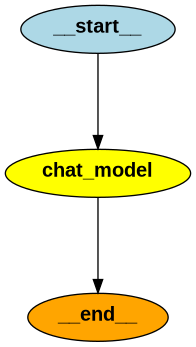

In [18]:
def chat_model_node(state: MessagesState):
    messages = trim_messages(
        state["messages"],
        max_tokens=100,
        strategy="last",
        token_counter=ChatOpenAI(model="gpt-4o"),
        allow_partial=False,
    )
    return {"messages": [llm.invoke(messages)]}


builder = StateGraph(MessagesState)

builder.add_node("chat_model", chat_model_node)
builder.add_edge(START, "chat_model")
builder.add_edge("chat_model", END)

graph = builder.compile()
display(Image(graph.get_graph().draw_png()))

In [19]:
messages.append(output['messages'][-1])
messages.append(HumanMessage(f"Tell me where Orcas live!", name="Lance"))

In [22]:
trim_messages(
    messages,
    max_tokens=100,
    strategy="last",
    token_counter=ChatOpenAI(model="gpt-4o"),
    allow_partial=False
    # allow_partial=True
)

[HumanMessage(content='Tell me where Orcas live!', additional_kwargs={}, response_metadata={}, name='Lance')]

In [23]:
messages_out_trim = graph.invoke({'messages': messages})